# linear regreesion（线性回归）
注意：python版本为3.6，
安装TensorFlow的方法：pip install tensorflow / conda install tensorflow

In [90]:
import pandas as pd
import seaborn as sns
sns.set(context='notebook',style='whitegrid',palette='dark')
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [91]:
df = pd.read_csv('ex1data1.txt',names = ['population','profile'])
df.head()

,population,profile
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profile       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


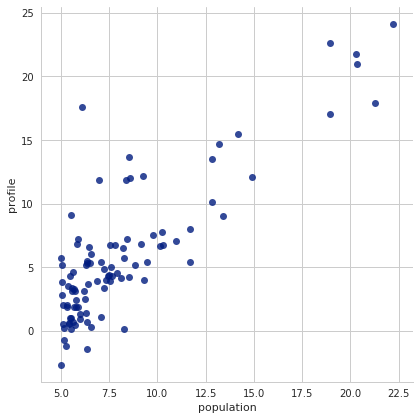

In [93]:
# fit_reg : bool, optional  If True, estimate and plot a regression model relating the x and y variables.
sns.lmplot('population','profile',df,size=6,fit_reg=False)
plt.show()

In [94]:
def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones':np.ones(len(df))}) #ones是m行1列的dataframe
    data = pd.concat([ones,df],axis=1) # 合并数据，根据列合并
    return data.iloc[:,:-1].as_matrix() # 这个操作返回 ndarray,不是矩阵

def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列

def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放


In [95]:
get_X(df)[:4]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032]])

In [96]:
df.describe()

,population,profile
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [97]:
df[:4]

,population,profile
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540


In [98]:
get_y(df)[:4]

array([ 17.592 ,   9.1302,  13.662 ,  11.854 ])

多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。


In [99]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.train.GradientDescentOptimizer):# 这个函数是旧金山的一个大神Lucas Shen写的
      # placeholder for graph input
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)

    # construct the graph
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1], 1),
                            initializer=tf.constant_initializer())  # n*1

        y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

In [100]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据，并赋予列名

data.head()#看下数据前5行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [101]:
X = get_X(data)
X.shape

(97, 2)

In [102]:
X[:4]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032]])

In [103]:
y = get_y(data)
y.shape

(97,)

In [104]:
y

array([ 17.592  ,   9.1302 ,  13.662  ,  11.854  ,   6.8233 ,  11.886  ,
         4.3483 ,  12.     ,   6.5987 ,   3.8166 ,   3.2522 ,  15.505  ,
         3.1551 ,   7.2258 ,   0.71618,   3.5129 ,   5.3048 ,   0.56077,
         3.6518 ,   5.3893 ,   3.1386 ,  21.767  ,   4.263  ,   5.1875 ,
         3.0825 ,  22.638  ,  13.501  ,   7.0467 ,  14.692  ,  24.147  ,
        -1.22   ,   5.9966 ,  12.134  ,   1.8495 ,   6.5426 ,   4.5623 ,
         4.1164 ,   3.3928 ,  10.117  ,   5.4974 ,   0.55657,   3.9115 ,
         5.3854 ,   2.4406 ,   6.7318 ,   1.0463 ,   5.1337 ,   1.844  ,
         8.0043 ,   1.0179 ,   6.7504 ,   1.8396 ,   4.2885 ,   4.9981 ,
         1.4233 ,  -1.4211 ,   2.4756 ,   4.6042 ,   3.9624 ,   5.4141 ,
         5.1694 ,  -0.74279,  17.929  ,  12.054  ,  17.054  ,   4.8852 ,
         5.7442 ,   7.7754 ,   1.0173 ,  20.992  ,   6.6799 ,   4.0259 ,
         1.2784 ,   3.3411 ,  -2.6807 ,   0.29678,   3.8845 ,   5.7014 ,
         6.7526 ,   2.0576 ,   0.47953,   0.20421, 

In [105]:
theta = np.zeros(X.shape[1])#X.shape[1]=2,代表特征数n

In [106]:
theta

array([ 0.,  0.])

In [107]:
X @ theta - y

array([-17.592  ,  -9.1302 , -13.662  , -11.854  ,  -6.8233 , -11.886  ,
        -4.3483 , -12.     ,  -6.5987 ,  -3.8166 ,  -3.2522 , -15.505  ,
        -3.1551 ,  -7.2258 ,  -0.71618,  -3.5129 ,  -5.3048 ,  -0.56077,
        -3.6518 ,  -5.3893 ,  -3.1386 , -21.767  ,  -4.263  ,  -5.1875 ,
        -3.0825 , -22.638  , -13.501  ,  -7.0467 , -14.692  , -24.147  ,
         1.22   ,  -5.9966 , -12.134  ,  -1.8495 ,  -6.5426 ,  -4.5623 ,
        -4.1164 ,  -3.3928 , -10.117  ,  -5.4974 ,  -0.55657,  -3.9115 ,
        -5.3854 ,  -2.4406 ,  -6.7318 ,  -1.0463 ,  -5.1337 ,  -1.844  ,
        -8.0043 ,  -1.0179 ,  -6.7504 ,  -1.8396 ,  -4.2885 ,  -4.9981 ,
        -1.4233 ,   1.4211 ,  -2.4756 ,  -4.6042 ,  -3.9624 ,  -5.4141 ,
        -5.1694 ,   0.74279, -17.929  , -12.054  , -17.054  ,  -4.8852 ,
        -5.7442 ,  -7.7754 ,  -1.0173 , -20.992  ,  -6.6799 ,  -4.0259 ,
        -1.2784 ,  -3.3411 ,   2.6807 ,  -0.29678,  -3.8845 ,  -5.7014 ,
        -6.7526 ,  -2.0576 ,  -0.47953,  -0.20421, 

In [108]:
# 所有元素的平方和的平均值
def lr_cost(theta,X,y):
#     """
#     X: R(m*n), m 样本数, n 特征数
#     y: R(m)
#     theta : R(n), 线性回归的参数
#     """
    m = X.shape[0] #m为样本数
    inner = X @ theta - y # R(m*1)，X @ theta等价于X.dot(theta)
    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [109]:
lr_cost(theta, X, y)#返回theta的值

32.072733877455669

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [110]:
def gradient(theta, X ,y):
    m = X.shape[0]
    inner = X.T @ (X@theta - y) # (m,n).T @ (m, 1) -> (n, 1)，X @ theta等价于X.dot(theta)
    return inner / m 

In [111]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
#   拟合线性回归，返回参数和代价
#     epoch: 批处理的轮数
#     """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()  # 拷贝一份，不和原来的theta混淆

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))

    return _theta, cost_data
#批量梯度下降函数

In [112]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [113]:
final_theta
#最终的theta

array([-2.28286727,  1.03099898])

In [114]:
cost_data

[32.072733877455669,
 6.7371904648700118,
 5.9315935686049563,
 5.9011547070813881,
 5.8952285864442207,
 5.8900949431173304,
 5.8850041584436443,
 5.8799324804914184,
 5.8748790947625729,
 5.8698439118063881,
 5.8648268653129305,
 5.8598278899321805,
 5.8548469205722897,
 5.8498838923765879,
 5.8449387407220339,
 5.8400114012183595,
 5.8351018097072265,
 5.8302099022613882,
 5.825335615183862,
 5.8204788850070983,
 5.8156396484921542,
 5.8108178426278689,
 5.8060134046300451,
 5.801226271940628,
 5.7964563822268991,
 5.7917036733806526,
 5.7869680835173956,
 5.7822495509755392,
 5.7775480143155962,
 5.7728634123193814,
 5.7681956839892141,
 5.7635447685471197,
 5.7589106054340489,
 5.7542931343090755,
 5.7496922950486269,
 5.7451080277456841,
 5.740540272709012,
 5.7359889704623814,
 5.7314540617437917,
 5.7269354875047016,
 5.7224331889092568,
 5.7179471073335284,
 5.7134771843647494,
 5.7090233618005488,
 5.7045855816481987,
 5.7001637861238557,
 5.6957579176518145,
 5.6913679188637

In [115]:
# 计算最终的代价
lr_cost(final_theta, X, y)

4.7138095311168655

# visualize cost data（代价数据可视化）

/home/gl/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


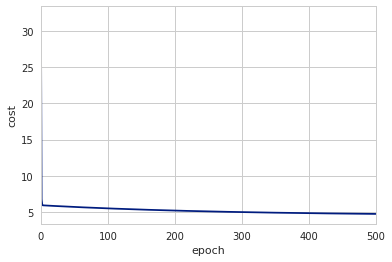

In [116]:
ax = sns.tsplot(cost_data, time=np.arange(epoch+1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()
#可以看到从第二轮代价数据变换很大，接下来平稳了

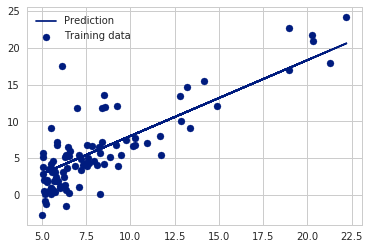

In [117]:
# y = theat0 + theta1*x
b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率
plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

# 3- 选修章节

In [118]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 标准化数据
最简单的方法是令：

 

其中  是平均值，sn 是标准差。


In [119]:
def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [120]:
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# 2. multi-var batch gradient decent（多变量批量梯度下降）

In [121]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))#看下数据的维度和类型

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [122]:
alpha = 0.01#学习率
theta = np.zeros(X.shape[1])#X.shape[1]：特征数n
epoch = 500#轮数

In [123]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

/home/gl/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


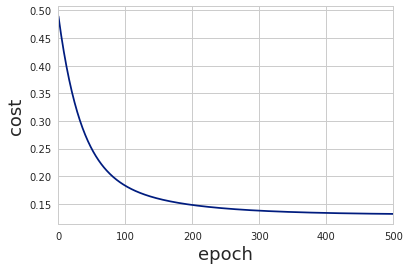

In [124]:
sns.tsplot(time=np.arange(len(cost_data)), data = cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()

In [125]:
final_theta

array([ -1.18994649e-16,   8.30383883e-01,   8.23982853e-04])

# 3. learning rate（学习率）

In [126]:
# numpy.linspace用于创建等差数列 logspac用于创建等比数列
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[  1.00000000e-05   3.00000000e-05   2.15443469e-04   6.46330407e-04
   4.64158883e-03   1.39247665e-02   1.00000000e-01   3.00000000e-01]


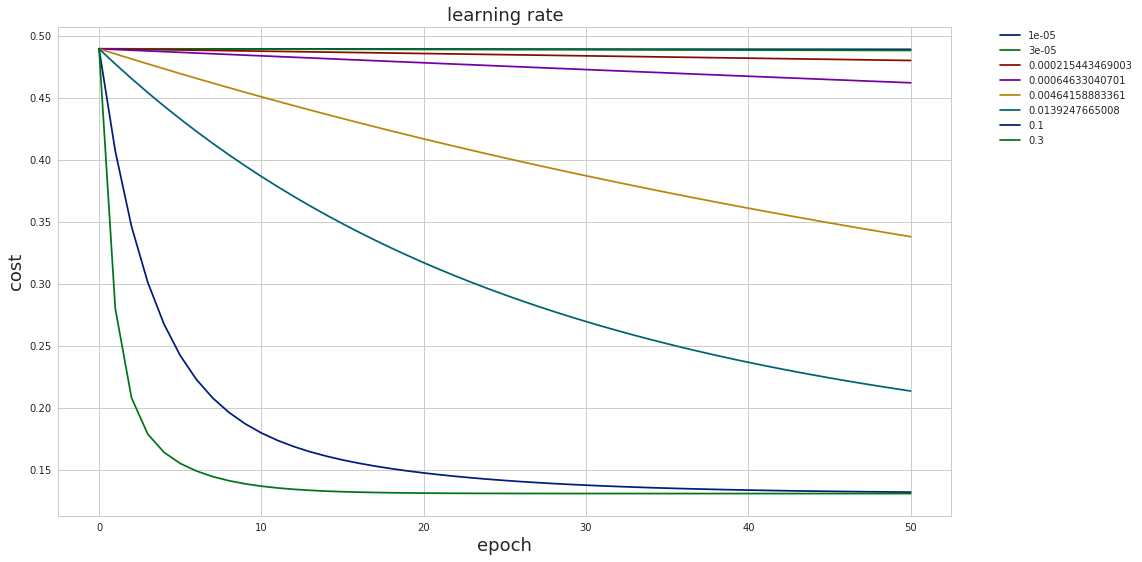

In [127]:
epoch=50

fig, ax = plt.subplots(figsize=(16, 9))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型



In [128]:
# 正规方程
# np.linalg.inv()：矩阵求逆
# np.linalg.det()：矩阵求行列式（标量)
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [129]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

array([ -1.04083409e-16,   8.84765988e-01,  -5.31788197e-02])

# run the tensorflow graph over several optimizer

In [130]:
X_data = get_X(data)
print(X_data.shape, type(X_data))

y_data = get_y(data).reshape(len(X_data), 1)  # special treatment for tensorflow input data
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


In [131]:
epoch = 2000
alpha = 0.01

In [132]:
optimizer_dict={'GD': tf.train.GradientDescentOptimizer,
                'Adagrad': tf.train.AdagradOptimizer,
                'Adam': tf.train.AdamOptimizer,
                'Ftrl': tf.train.FtrlOptimizer,
                'RMS': tf.train.RMSPropOptimizer
               }
results = []
for name in optimizer_dict:
    res = linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])
    res['name'] = name
    results.append(res)

ValueError: Variable linear-regression/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-45-e7aef6b5fc66>", line 10, in linear_regression
    initializer=tf.constant_initializer()) #n*1
  File "<ipython-input-82-9b6ae69e3935>", line 9, in <module>
    res = linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])
  File "/home/gl/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)


# 画图

No handles with labels found to put in legend.


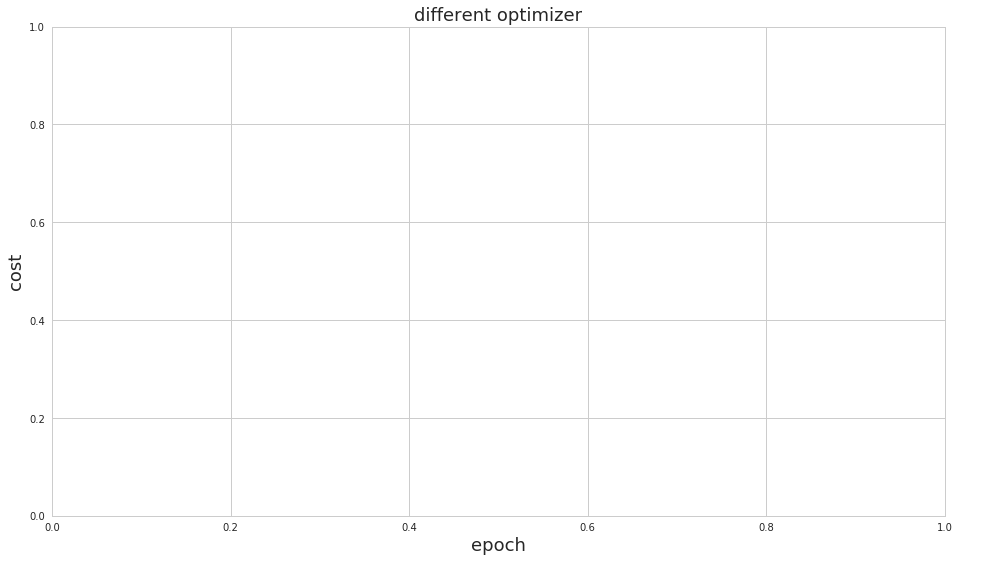

In [133]:
fig, ax = plt.subplots(figsize=(16, 9))

for res in results: 
    loss_data = res['loss']
    
#     print('for optimizer {}'.format(res['name']))
#     print('final parameters\n', res['parameters'])
#     print('final loss={}\n'.format(loss_data[-1]))
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('different optimizer', fontsize=18)
plt.show()